In [1]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from timeit import default_timer as timer

In [2]:
def getImage(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [3]:
def getgray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [4]:
def chaosDisplay(img, num):
    rows, cols, ch = img.shape
    n = rows
    display_img   = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            display_img  [x][y] = img[(x+y)%n][(x+2*y)%n]  
    return display_img   

In [5]:
def Encryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = chaosDisplay(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_enc.png", img)
    return img

In [6]:
def Decryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = chaosDisplay(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_dec.png",img)
    #decryptionStarts = Decryption(image + "_enc.png", key)
    #decryptionStarts = Decryption(image1 + "_enc.png", key)
    return img
  

In [7]:
image = "originalImage"
ext = ".png"
key = 20

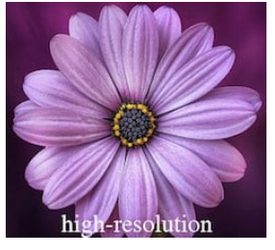

In [8]:
img = cv2.imread(image + ext)
cv2_imshow(img)
row,col=img.shape[0],img.shape[1]


In [9]:
row

250

In [10]:
col

275

Time taken for encryption 1.6803418399999828


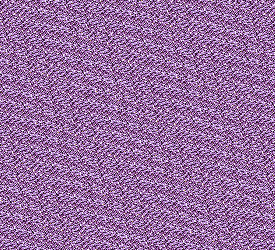

In [11]:
start = timer()
encryptionStarts =  Encryption(image + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

Time taken for encryption 59.292555737999976


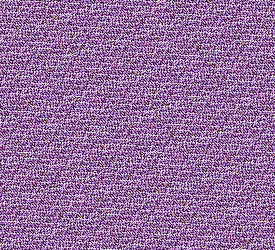

In [17]:
start = timer()
decryptionStarts = Decryption(image + "_enc.png", key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(decryptionStarts)

In [13]:
image1 = "flower"
ext = ".png"
key = 29

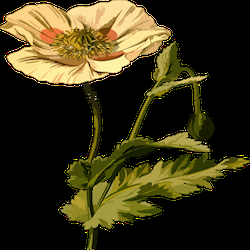

In [14]:
img = cv2.imread(image1 + ext)
cv2_imshow(img)

Time taken for encryption 2.162278944999997


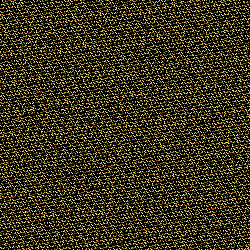

In [15]:
start = timer()
encryptionStarts =  Encryption(image1 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

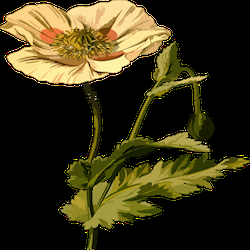

In [16]:
decryptionStarts = Decryption(image1 + "_enc.png", key)
cv2_imshow(decryptionStarts)